In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import copy
import torch.nn as nn
import torch.nn.functional as F
import os

from dataload import *
from autoencoder import *

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

## Parameters

In [3]:
batch_size_train = 16
batch_size_test = 16

train_loader, test_loader = define_landscapes_loaders(batch_size_train, batch_size_test, 
                                                      rescale=256, crop=224)

encoding_dim = 2048
lr = 0.00005
n_epochs = 1

Loaded image shape in tensor: torch.Size([16, 3, 224, 224])


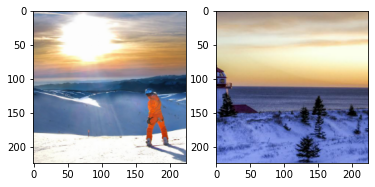

In [4]:
# get minibatch
x = next(iter(train_loader))
x_test = next(iter(test_loader))

print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2);
img1 = x[0].numpy().transpose((1, 2, 0))
img2 = x_test[0].detach().numpy().transpose((1, 2, 0))
axes[0].imshow(img1); # .transpose((1, 2, 0))
axes[1].imshow(img2);

In [5]:
#autoencoder = MNIST_Autoencoder(28*28, encoding_dim)
autoencoder = Res_Autoencoder_224(224*224, encoding_dim)
opt = torch.optim.Adam(autoencoder.parameters(), lr=lr)
#autoencoder.apply(init_weights)
#autoencoder = Autoencoder(224*224, encoding_dim)

Shape : torch.Size([16, 3, 224, 224])


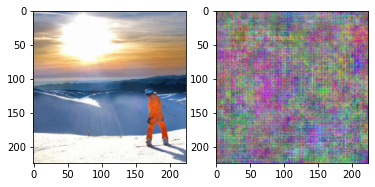

In [6]:
fig,axes = plt.subplots(1,2);
reconstructed = autoencoder(x)
img1 = x[0].numpy().transpose((1, 2, 0))
img2 = reconstructed[0].detach().numpy().transpose((1, 2, 0))
print(f"Shape : {reconstructed.shape}")
axes[0].imshow(img1); 
axes[1].imshow(img2)

In [7]:
print(get_n_params(autoencoder))

82137667


In [8]:
train_losses, val_losses = [], []

Epoch 1/20
----------


100%|█████████████████████████████████████████| 243/243 [00:18<00:00, 12.83it/s]


train loss 0.599687


  0%|                                                    | 0/27 [00:00<?, ?it/s]

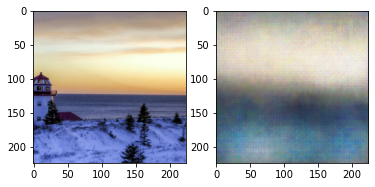

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.91it/s]


valid loss 0.571738

Epoch 2/20
----------


100%|█████████████████████████████████████████| 243/243 [00:18<00:00, 13.03it/s]


train loss 0.571221


  0%|                                                    | 0/27 [00:00<?, ?it/s]

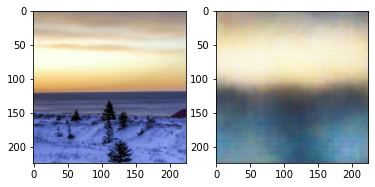

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.91it/s]


valid loss 0.567026

Epoch 3/20
----------


100%|█████████████████████████████████████████| 243/243 [00:18<00:00, 13.05it/s]


train loss 0.565958


  0%|                                                    | 0/27 [00:00<?, ?it/s]

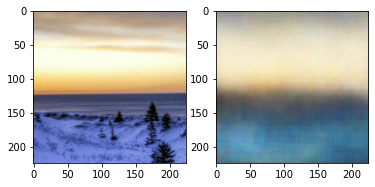

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.91it/s]


valid loss 0.561969

Epoch 4/20
----------


100%|█████████████████████████████████████████| 243/243 [00:18<00:00, 12.82it/s]


train loss 0.563199


  0%|                                                    | 0/27 [00:00<?, ?it/s]

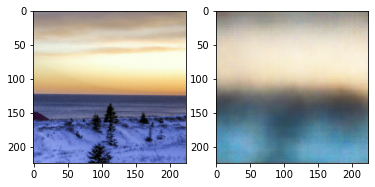

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.81it/s]


valid loss 0.559751

Epoch 5/20
----------


100%|█████████████████████████████████████████| 243/243 [00:19<00:00, 12.68it/s]


train loss 0.561585


  0%|                                                    | 0/27 [00:00<?, ?it/s]

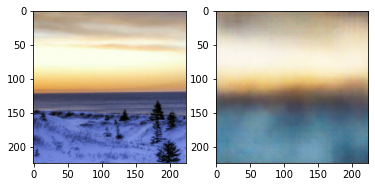

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.89it/s]


valid loss 0.559149

Epoch 6/20
----------


100%|█████████████████████████████████████████| 243/243 [00:19<00:00, 12.63it/s]


train loss 0.559994


  0%|                                                    | 0/27 [00:00<?, ?it/s]

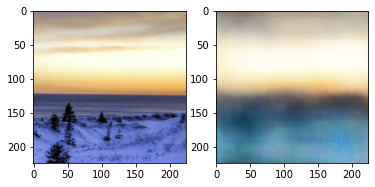

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.81it/s]


valid loss 0.560703

Epoch 7/20
----------


100%|█████████████████████████████████████████| 243/243 [00:18<00:00, 12.94it/s]


train loss 0.558512


  0%|                                                    | 0/27 [00:00<?, ?it/s]

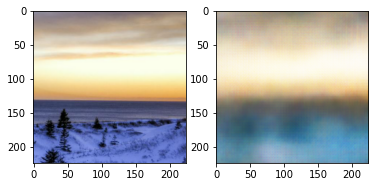

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.83it/s]


valid loss 0.559488

Epoch 8/20
----------


100%|█████████████████████████████████████████| 243/243 [00:19<00:00, 12.75it/s]


train loss 0.556703


  0%|                                                    | 0/27 [00:00<?, ?it/s]

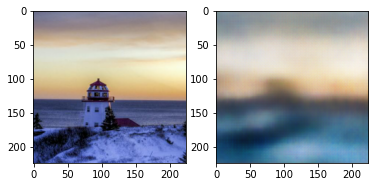

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.86it/s]


valid loss 0.556420

Epoch 9/20
----------


100%|█████████████████████████████████████████| 243/243 [00:18<00:00, 12.91it/s]


train loss 0.555898


  0%|                                                    | 0/27 [00:00<?, ?it/s]

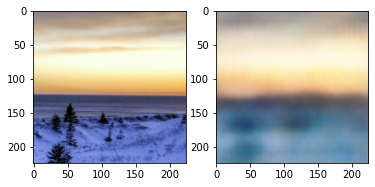

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.80it/s]


valid loss 0.556571

Epoch 10/20
----------


100%|█████████████████████████████████████████| 243/243 [00:19<00:00, 12.65it/s]


train loss 0.555731


  0%|                                                    | 0/27 [00:00<?, ?it/s]

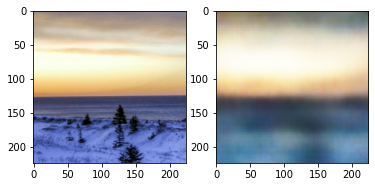

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.91it/s]


valid loss 0.555288

Epoch 11/20
----------


100%|█████████████████████████████████████████| 243/243 [00:19<00:00, 12.70it/s]


train loss 0.554767


  0%|                                                    | 0/27 [00:00<?, ?it/s]

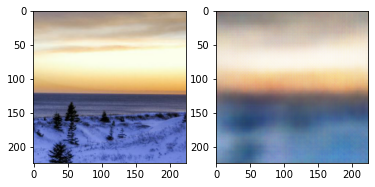

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.83it/s]


valid loss 0.553090

Epoch 12/20
----------


100%|█████████████████████████████████████████| 243/243 [00:18<00:00, 12.99it/s]


train loss 0.554651


  0%|                                                    | 0/27 [00:00<?, ?it/s]

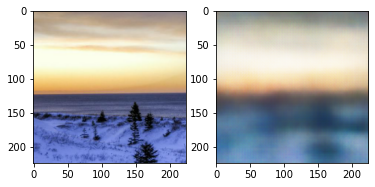

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.92it/s]


valid loss 0.555901

Epoch 13/20
----------


100%|█████████████████████████████████████████| 243/243 [00:19<00:00, 12.69it/s]


train loss 0.553879


  0%|                                                    | 0/27 [00:00<?, ?it/s]

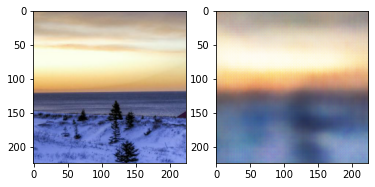

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.85it/s]


valid loss 0.554095

Epoch 14/20
----------


100%|█████████████████████████████████████████| 243/243 [00:19<00:00, 12.62it/s]


train loss 0.553915


  0%|                                                    | 0/27 [00:00<?, ?it/s]

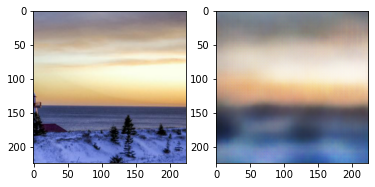

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.82it/s]


valid loss 0.554346

Epoch 15/20
----------


100%|█████████████████████████████████████████| 243/243 [00:18<00:00, 12.88it/s]


train loss 0.553151


  0%|                                                    | 0/27 [00:00<?, ?it/s]

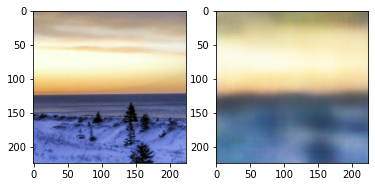

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.86it/s]


valid loss 0.554395

Epoch 16/20
----------


100%|█████████████████████████████████████████| 243/243 [00:18<00:00, 13.02it/s]


train loss 0.552601


  0%|                                                    | 0/27 [00:00<?, ?it/s]

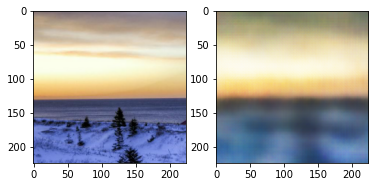

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.77it/s]


valid loss 0.554059

Epoch 17/20
----------


100%|█████████████████████████████████████████| 243/243 [00:19<00:00, 12.59it/s]


train loss 0.552004


  0%|                                                    | 0/27 [00:00<?, ?it/s]

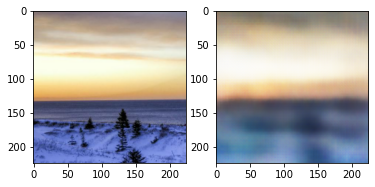

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.77it/s]


valid loss 0.552607

Epoch 18/20
----------


100%|█████████████████████████████████████████| 243/243 [00:19<00:00, 12.67it/s]


train loss 0.551514


  0%|                                                    | 0/27 [00:00<?, ?it/s]

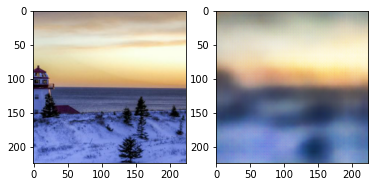

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.89it/s]


valid loss 0.552415

Epoch 19/20
----------


100%|█████████████████████████████████████████| 243/243 [00:18<00:00, 13.04it/s]


train loss 0.551302


  0%|                                                    | 0/27 [00:00<?, ?it/s]

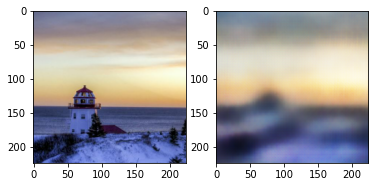

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.82it/s]


valid loss 0.551848

Epoch 20/20
----------


100%|█████████████████████████████████████████| 243/243 [00:19<00:00, 12.75it/s]


train loss 0.551637


  0%|                                                    | 0/27 [00:00<?, ?it/s]

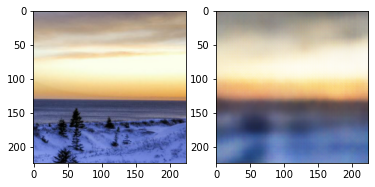

100%|███████████████████████████████████████████| 27/27 [00:03<00:00,  6.78it/s]

valid loss 0.551122

CPU times: user 5min 18s, sys: 1min 14s, total: 6min 33s
Wall time: 7min 40s


In [9]:
%time t_l, v_l = train(autoencoder, opt, trainloader=train_loader, valloader=test_loader, num_epochs=20)
train_losses.extend(t_l); val_losses.extend(v_l)

In [10]:
x = next(iter(test_loader))

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

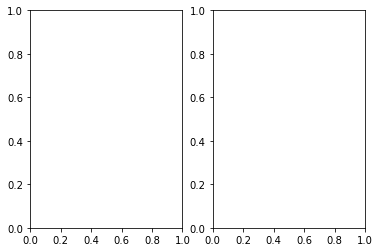

In [11]:
fig,axes = plt.subplots(1,2);
reconstructed = autoencoder(x)
img1 = x[0].numpy().transpose((1, 2, 0))
img2 = reconstructed[0].detach().numpy().transpose((1, 2, 0))
print(f"Shape : {reconstructed.shape}")
axes[0].imshow(img1); 
axes[1].imshow(img2)